<a href="https://colab.research.google.com/github/hafizhfadhullah/Python/blob/main/MYC/CDD_ML_Part_4_MYC_Regression_Random_Forest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [3]:
import pandas as pd

In [4]:
dataset_url = 'https://github.com/hafizhfadhullah/Data/raw/main/MYC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.481486
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.835647
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.221849
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.221849
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.537602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.376751
895,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.161151
896,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.886057
897,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.619789


In [5]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
895,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
896,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
897,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,4.481486
1,3.835647
2,4.221849
3,4.221849
4,4.537602
...,...
894,7.376751
895,8.161151
896,8.886057
897,8.619789


# Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP157,PubchemFP160,...,PubchemFP737,PubchemFP758,PubchemFP767,PubchemFP776,PubchemFP778,PubchemFP779,PubchemFP799,PubchemFP800,PubchemFP821,PubchemFP830
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
895,1,1,0,0,0,1,1,1,0,0,...,1,1,0,1,0,0,0,1,1,0
896,1,1,0,0,0,1,1,1,1,1,...,1,1,0,1,0,0,0,1,1,0
897,1,1,0,0,0,1,1,1,0,0,...,1,1,0,1,0,0,0,1,1,0


In [8]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.886288918945438

## Model Prediction

In [11]:
Y_pred = model.predict(X)
Y_pred

array([4.47738506, 4.04290795, 4.35873397, 4.35268571, 4.46244024,
       4.23294251, 4.23916981, 4.84869961, 4.63548333, 4.55557462,
       4.26308911, 5.17291148, 5.43864881, 4.34940939, 5.2149953 ,
       5.46642923, 5.25670296, 4.38938091, 4.36216161, 4.30445004,
       4.69271042, 5.36703281, 5.67212384, 4.5048727 , 4.51835741,
       4.4805859 , 4.56802545, 4.56802545, 4.61174552, 4.57168903,
       4.62086089, 4.50962082, 5.4968644 , 4.89156265, 5.27707766,
       4.79256956, 5.50762639, 4.55590701, 4.8989075 , 5.1980735 ,
       5.11378371, 5.17445742, 4.9304867 , 5.14537137, 4.67703083,
       5.29817592, 4.98245903, 4.81098547, 5.1980735 , 5.04217577,
       5.20387987, 5.26135207, 6.0046813 , 5.2307087 , 5.26931994,
       6.0046813 , 5.98666655, 5.10599838, 4.77254457, 5.70015693,
       5.53989399, 5.37533727, 5.44898198, 5.56686551, 5.38282072,
       5.11742702, 4.9777284 , 5.67118509, 5.25129396, 5.65554825,
       5.09326969, 5.53989399, 5.90838554, 6.13040172, 6.00468

## Model Performance

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.10
Coefficient of determination (R^2): 0.89


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

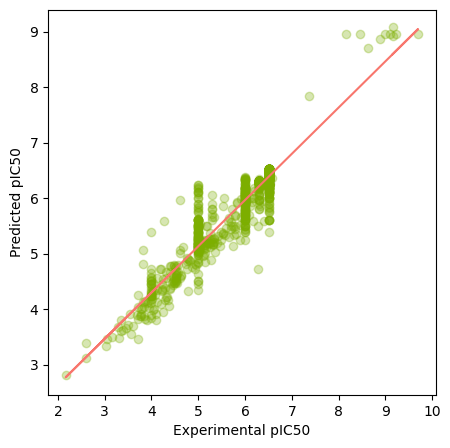

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [15]:
import pickle

In [16]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))